<a href="https://colab.research.google.com/github/marilikalantzi/datajour/blob/main/Final_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/Τελική εργασία σεμινάριο/report4.xlsx')
df.tail(1)

,type,source,title,text,categories,sentiment,date,time,link
4999,web,ertnews.gr,Γερμανία – Ευρωεκλογές: Ομαλά εξελίσσεται η ψη...,Από τις 08:00 (τοπική ώρα) βρίσκεται σε εξέλιξ...,ΕΥΡΩΕΚΛΟΓΕΣ - ΕΥΡΩΒΟΥΛΗ,Positive,2024-06-09,17:50:20,https://www.ertnews.gr/eidiseis/diethni/german...


In [ ]:
my_sites = ["parapolitika.gr", 'iefimerida.gr', 'protothema.gr','athensvoice.gr','cnn.gr','thetoc.gr', 'efsyn.gr','newsit.gr', 'naftemporiki.gr','lifo.gr','tovima.gr','tanea.gr', 'in.gr','newsbomb.gr','news247.gr','enikos.gr', 'skai.gr', 'zougla.gr', 'kathimerini.gr', 'ethnos.gr',]

In [ ]:
len(my_sites)

20

In [ ]:
df = df[df['source'].isin(my_sites)]
df.head(1)

,type,source,title,text,categories,sentiment,date,time,link
6,web,tovima.gr,Ευρωεκλογές 2024: Παραμένουν στην τρίτη θέση π...,09.06.2024\n23:38\nΚόσμος\nNewsroom\nΟι φιλελε...,ΕΥΡΩΕΚΛΟΓΕΣ - ΕΥΡΩΒΟΥΛΗ,Positive,2024-06-09,23:59:17,https://www.tovima.gr/2024/06/09/world/eyroekl...


In [ ]:
len(df)

1341

In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df = df.reset_index(drop=True)

<ipython-input-9-ca293342285f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)
<ipython-input-9-ca293342285f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
df['full_text'] = df[['title', 'text']].agg(' '.join, axis=1)

In [ ]:
df['datetime'] = df[['date', 'time']].agg(' '.join, axis=1)

In [ ]:
selected_cols_df = df[["source", "title", "datetime",  "full_text"]]
selected_cols_df.head(1)

,source,title,datetime,full_text
0,tovima.gr,Ευρωεκλογές 2024: Παραμένουν στην τρίτη θέση π...,2024-06-09 23:59:17,Ευρωεκλογές 2024: Παραμένουν στην τρίτη θέση π...


In [ ]:
len(selected_cols_df)

1315

In [ ]:
short_df = selected_cols_df[['datetime' ,'full_text']]
short_df.head(1)

,datetime,full_text
0,2024-06-09 23:59:17,Ευρωεκλογές 2024: Παραμένουν στην τρίτη θέση π...


In [ ]:
short_df['year'] = pd.DatetimeIndex(short_df['datetime']).year
short_df['month'] = pd.DatetimeIndex(short_df['datetime']).month
short_df['day'] = pd.DatetimeIndex(short_df['datetime']).day
short_df['hour'] = pd.DatetimeIndex(short_df['datetime']).hour

<ipython-input-15-d89a16ac556a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['year'] = pd.DatetimeIndex(short_df['datetime']).year


In [ ]:
short_df.head(1)

,datetime,full_text,year,month,day,hour
0,2024-06-09 23:59:17,Ευρωεκλογές 2024: Παραμένουν στην τρίτη θέση π...,2024,6,9,23


<Axes: xlabel='hour'>

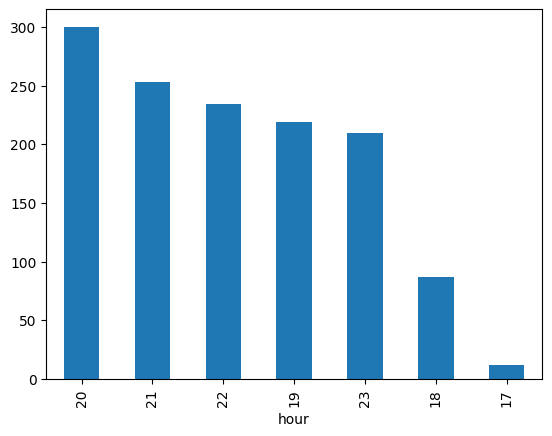

In [ ]:
short_df['hour'].value_counts().plot(kind='bar')

In [ ]:
df['date'] = df[['date', 'time']].agg(' '.join, axis=1)

In [ ]:
selected_cols_df = df[["source", "title", "date",  "full_text"]]
selected_cols_df.head(1)

,source,title,date,full_text
0,tovima.gr,Ευρωεκλογές 2024: Παραμένουν στην τρίτη θέση π...,2024-06-09 23:59:17,Ευρωεκλογές 2024: Παραμένουν στην τρίτη θέση π...


In [ ]:
selected_cols_df.to_csv("/content/gdrive/MyDrive/Τελική εργασία σεμινάριο/report1c.csv", index=False)
selected_cols_df.tail(1)

,source,title,date,full_text
1314,skai.gr,"Πόλωση, επιθέσεις, διαδηλώσεις: Oι «γερμανικές...",2024-06-09 17:51:00,"Πόλωση, επιθέσεις, διαδηλώσεις: Oι «γερμανικές..."
